In [1]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [2]:
def get_tweets():
    import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#coronavirus') \
        .setSince("2020-01-31") \
        .setUntil("2020-02-29") \
        .setMaxTweets(100)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [3]:
#import nltk
#nltk.download()
# reading text file
text = ""
text_tweets = get_tweets()
length = len(text_tweets)




In [4]:
text_tweets

[['#coronavirus 38% of Americans will not drink Corona beer to protect themselves against the virus. Little do they know that #coronabeer is the only known treatment!'],
 ['#NACIONAL | #Centroamérica pide ayuda financiera por #coronavirus https://cutt.ly/6r7Ai4l'],
 ['¡Nos habla sobre los casos de infectados por el #Coronavirus en Riverside California! @YaoskaMachado ¡Si te lo perdiste, baja #ElPodcastMasChido! http://apple.co/2O7q4dx'],
 ['La recaída o recidiva es cierto, es preocupante, porque puede ser más pernicioso que el primer contagio. En China se estaba estudiando el por qué en algunos casos la reinfección comprometía al sistema cardíaco cuando inicialmente no lo hacía. #coronavirus'],
 ['#مصر #خالد_الشطي #كورونا_كشف_التجار #الصين #كرونا_في_الكويت #خالد_كورونا #Corona #coronavirus #التطعيم_وقاية #'],
 ['Ya llego a chile? #coronavirus'],
 ['#China #coronavirus Dr. Anthony Fauci '],
 ['#Coronavirus COVID-19 (2019-nCoV) interactive map https://www.arcgis.com/apps/opsdashboard/ind

In [5]:
for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))


In [6]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Fahad
[nltk_data]     Ehtesham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
tokenized_words = word_tokenize(cleaned_text)

In [8]:
tokenized_words

['coronavirus',
 'live',
 'updates',
 'dow',
 'caps',
 'worst',
 'week',
 'since',
 'financial',
 'crisis',
 'viendo',
 'mileniolive',
 'mientras',
 'ceno',
 'y',
 'atendiendo',
 'a',
 'la',
 'genial',
 'charla',
 'sobre',
 'el',
 'coronavirus',
 'as',
 'it',
 'spreads',
 'globally',
 'the',
 'coronavirus',
 'is',
 'creating',
 'unique',
 'if',
 'not',
 'unprecedented',
 'pressures',
 'kornferry',
 'experts',
 'weigh',
 'in',
 'on',
 'how',
 'corporate',
 'executives',
 'can',
 'lead',
 'through',
 'the',
 'crisis',
 'gtgt',
 'httpskrnfybz2pamkcb',
 'leadership',
 'management',
 'covid19',
 'publichealth',
 'agility',
 'remotework',
 'hacemos',
 'chiste',
 'sobre',
 'pedofilia',
 'que',
 'no',
 'hagamos',
 'del',
 'pinshi',
 'coronavirus',
 'urgente',
 'la',
 'administración',
 'trump',
 'cancela',
 'cumbre',
 'con',
 'líderes',
 'asiáticos',
 'planeada',
 'para',
 'lasvegas',
 'el',
 'mes',
 'que',
 'viene',
 'por',
 'el',
 'coronavirus',
 'coronavirus',
 'ninguna',
 'plaga',
 'tocará

In [9]:
# import stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

In [10]:
# Get emotions text
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)



Counter({' happy': 3, ' attracted': 3, ' sad': 3, ' average': 2, ' free': 2, ' lost': 1, ' surprise': 1, ' fearful': 1})


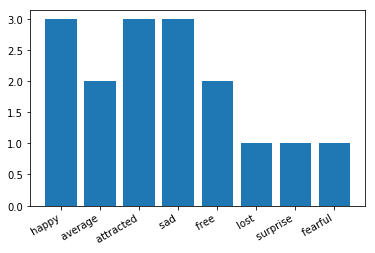

In [11]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()